In [154]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

from linearmodels.panel import PanelOLS

# DIDの発想に基づく施策効果分析

In [99]:
# データの読み込み
df_organ_donations_short= pd.read_csv('../data/ch4_organ_donations_short.csv')
df_organ_donations_short.head()

,State,Quarter,Rate,Quarter_Num,IsTreatmentGroup,AfterTreatment,IsTreatment
0,Alaska,Q22011,0.7700,3,0,0,0
1,Alaska,Q32011,0.7800,4,0,1,0
2,Arizona,Q22011,0.2261,3,0,0,0
3,Arizona,Q32011,0.2503,4,0,1,0
4,California,Q22011,0.2743,3,1,0,0


In [8]:
# 4状況ごとのアウトカムの計算
df_organ_donations_short.groupby(['IsTreatmentGroup', 'AfterTreatment'])['Rate'].mean().reset_index()

,IsTreatmentGroup,AfterTreatment,Rate
0,0,0,0.449015
1,0,1,0.459881
2,1,0,0.274300
3,1,1,0.263600


In [10]:
(26.4 - 27.4) - (46.0 - 44.9)

-2.1000000000000014

# 実例：DIDによる訴求内容変更施策の分析

In [94]:
# 推定
result = smf.ols("Rate ~ IsTreatment + C(State) + C(Quarter_Num)", data=df_organ_donations_short).fit()
# 標準誤差の補正
result_correted = result.get_robustcov_results('cluster', groups=df_organ_donations_short['State'])
# 結果の出力
result_correted.summary().tables[1]

/Users/s13592/Documents/project/python-treatment-evaluation/.venv/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 28, but rank is 1
  warnings.warn('covariance of constraints does not have full '


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.7696,0.004,216.842,0.000,0.762,0.777
C(State)[T.Arizona],-0.5368,1.16e-15,-4.62e+14,0.000,-0.537,-0.537
C(State)[T.California],-0.4953,0.004,-139.552,0.000,-0.503,-0.488
C(State)[T.Colorado],-0.1024,5.99e-16,-1.71e+14,0.000,-0.102,-0.102
C(State)[T.Connecticut],-0.3758,5.78e-16,-6.5e+14,0.000,-0.376,-0.376
C(State)[T.District of Columbia],-0.4262,8.08e-16,-5.27e+14,0.000,-0.426,-0.426
C(State)[T.Florida],-0.3686,5.82e-16,-6.33e+14,0.000,-0.369,-0.369
C(State)[T.Hawaii],-0.3467,6.65e-16,-5.22e+14,0.000,-0.347,-0.347
C(State)[T.Louisiana],-0.1966,1e-15,-1.96e+14,0.000,-0.197,-0.197
C(State)[T.Maryland],-0.3115,6.63e-16,-4.7e+14,0.000,-0.312,-0.312


- 本のために一部を省略して表示

In [95]:
result_table_abbv = result_correted.summary().tables[1]
for i in range(4, 26):
    result_table_abbv.pop(4)
result_table_abbv

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.7696,0.004,216.842,0.000,0.762,0.777
C(State)[T.Arizona],-0.5368,1.16e-15,-4.62e+14,0.000,-0.537,-0.537
C(State)[T.California],-0.4953,0.004,-139.552,0.000,-0.503,-0.488
C(State)[T.Wisconsin],-0.2046,5.83e-16,-3.51e+14,0.000,-0.205,-0.205
C(State)[T.Wyoming],-0.1826,5.77e-16,-3.17e+14,0.000,-0.183,-0.183
C(Quarter_Num)[T.4],0.0109,0.007,1.531,0.138,-0.004,0.025
IsTreatment,-0.0216,0.007,-3.038,0.005,-0.036,-0.007


- linermodelsを使っても同じ結果になることを確認

In [85]:
mod = PanelOLS.from_formula("Rate ~ IsTreatment + EntityEffects + TimeEffects", data=df_organ_donations_short.set_index(["State", "Quarter_Num"]))
result = mod.fit(cov_type='clustered', cluster_entity=True)
result.summary.tables[1]

,Parameter,Std. Err.,T-stat,P-value,Lower CI,Upper CI
IsTreatment,-0.0216,0.0070,-3.0673,0.0051,-0.0360,-0.0071


# 2期間以上のデータの場合のDID
## 実例：イベントスタディによる訴求内容変更施策の分析

### 二期間DIDとして分析

In [148]:
# データの読み込み
df_organ_donations_full= pd.read_csv('../data/ch4_organ_donations_full.csv')
df_organ_donations_full.head(10)

,State,Quarter,Rate,Quarter_Num,IsTreatmentGroup,AfterTreatment,IsTreatment
0,Alaska,Q42010,0.7500,1,0,0,0
1,Alaska,Q12011,0.7700,2,0,0,0
2,Alaska,Q22011,0.7700,3,0,0,0
3,Alaska,Q32011,0.7800,4,0,1,0
4,Alaska,Q42011,0.7800,5,0,1,0
5,Alaska,Q12012,0.7900,6,0,1,0
6,Arizona,Q42010,0.2634,1,0,0,0
7,Arizona,Q12011,0.2092,2,0,0,0
8,Arizona,Q22011,0.2261,3,0,0,0
9,Arizona,Q32011,0.2503,4,0,1,0


In [149]:
# 推定
result = smf.ols("Rate ~ IsTreatment + C(State) + C(Quarter_Num)", data=df_organ_donations_short).fit()
# 標準誤差の補正
result_correted = result.get_robustcov_results('cluster', groups=df_organ_donations_short['State'])
# 結果の出力
result_correted.summary().tables[1]

/Users/s13592/Documents/project/python-treatment-evaluation/.venv/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 28, but rank is 1
  warnings.warn('covariance of constraints does not have full '


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.7696,0.004,216.842,0.000,0.762,0.777
C(State)[T.Arizona],-0.5368,1.16e-15,-4.62e+14,0.000,-0.537,-0.537
C(State)[T.California],-0.4953,0.004,-139.552,0.000,-0.503,-0.488
C(State)[T.Colorado],-0.1024,5.99e-16,-1.71e+14,0.000,-0.102,-0.102
C(State)[T.Connecticut],-0.3758,5.78e-16,-6.5e+14,0.000,-0.376,-0.376
C(State)[T.District of Columbia],-0.4262,8.08e-16,-5.27e+14,0.000,-0.426,-0.426
C(State)[T.Florida],-0.3686,5.82e-16,-6.33e+14,0.000,-0.369,-0.369
C(State)[T.Hawaii],-0.3467,6.65e-16,-5.22e+14,0.000,-0.347,-0.347
C(State)[T.Louisiana],-0.1966,1e-15,-1.96e+14,0.000,-0.197,-0.197
C(State)[T.Maryland],-0.3115,6.63e-16,-4.7e+14,0.000,-0.312,-0.312


上記のテーブルの省略版

In [150]:
result_table_abbv = result_correted.summary().tables[1]
for i in range(4, 26):
    result_table_abbv.pop(4)
result_table_abbv

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.7696,0.004,216.842,0.000,0.762,0.777
C(State)[T.Arizona],-0.5368,1.16e-15,-4.62e+14,0.000,-0.537,-0.537
C(State)[T.California],-0.4953,0.004,-139.552,0.000,-0.503,-0.488
C(State)[T.Wisconsin],-0.2046,5.83e-16,-3.51e+14,0.000,-0.205,-0.205
C(State)[T.Wyoming],-0.1826,5.77e-16,-3.17e+14,0.000,-0.183,-0.183
C(Quarter_Num)[T.4],0.0109,0.007,1.531,0.138,-0.004,0.025
IsTreatment,-0.0216,0.007,-3.038,0.005,-0.036,-0.007


### イベントスタディによる分析

In [147]:
# データの読み込み
df_organ_donations_full= pd.read_csv('../data/ch4_organ_donations_full.csv')

In [144]:
# 時間に関するダミー変数を作成
quarter_dummies = pd.get_dummies(df_organ_donations_full['Quarter_Num'], prefix='QuarterNum', drop_first=False)
df_regression = pd.concat([df_organ_donations_full, quarter_dummies], axis=1)

In [145]:
df_regression.head(10)

,State,Quarter,Rate,Quarter_Num,IsTreatmentGroup,AfterTreatment,IsTreatment,QuarterNum_1,QuarterNum_2,QuarterNum_3,QuarterNum_4,QuarterNum_5,QuarterNum_6
0,Alaska,Q42010,0.7500,1,0,0,0,1,0,0,0,0,0
1,Alaska,Q12011,0.7700,2,0,0,0,0,1,0,0,0,0
2,Alaska,Q22011,0.7700,3,0,0,0,0,0,1,0,0,0
3,Alaska,Q32011,0.7800,4,0,1,0,0,0,0,1,0,0
4,Alaska,Q42011,0.7800,5,0,1,0,0,0,0,0,1,0
5,Alaska,Q12012,0.7900,6,0,1,0,0,0,0,0,0,1
6,Arizona,Q42010,0.2634,1,0,0,0,1,0,0,0,0,0
7,Arizona,Q12011,0.2092,2,0,0,0,0,1,0,0,0,0
8,Arizona,Q22011,0.2261,3,0,0,0,0,0,1,0,0,0
9,Arizona,Q32011,0.2503,4,0,1,0,0,0,0,1,0,0


In [152]:
# 分析
result = smf.ols(
    "Rate ~ QuarterNum_1:IsTreatmentGroup + QuarterNum_2:IsTreatmentGroup + QuarterNum_4:IsTreatmentGroup + QuarterNum_5:IsTreatmentGroup + QuarterNum_6:IsTreatmentGroup + C(State) + C(Quarter_Num)", 
    data=df_regression
).fit()
# 標準誤差の補正
result_correted = result.get_robustcov_results('cluster', groups=df_regression['State'])
# 結果の出力
result_correted.summary().tables[1]

/Users/s13592/Documents/project/python-treatment-evaluation/.venv/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 36, but rank is 5
  warnings.warn('covariance of constraints does not have full '


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.7657,0.005,142.389,0.000,0.755,0.777
C(State)[T.Arizona],-0.5329,1.59e-15,-3.36e+14,0.000,-0.533,-0.533
C(State)[T.California],-0.4962,0.003,-158.861,0.000,-0.503,-0.490
C(State)[T.Colorado],-0.1055,1.51e-15,-7e+13,0.000,-0.105,-0.105
C(State)[T.Connecticut],-0.3802,2.01e-15,-1.89e+14,0.000,-0.380,-0.380
C(State)[T.District of Columbia],-0.4301,1.65e-15,-2.6e+14,0.000,-0.430,-0.430
C(State)[T.Florida],-0.3770,1.59e-15,-2.37e+14,0.000,-0.377,-0.377
C(State)[T.Hawaii],-0.3524,1.57e-15,-2.24e+14,0.000,-0.352,-0.352
C(State)[T.Louisiana],-0.2167,1.62e-15,-1.34e+14,0.000,-0.217,-0.217
C(State)[T.Maryland],-0.3076,1.64e-15,-1.88e+14,0.000,-0.308,-0.308


In [153]:
result_table_abbv = result_correted.summary().tables[1]
for i in range(4, 30):
    result_table_abbv.pop(4)
result_table_abbv

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.7657,0.005,142.389,0.000,0.755,0.777
C(State)[T.Arizona],-0.5329,1.59e-15,-3.36e+14,0.000,-0.533,-0.533
C(State)[T.California],-0.4962,0.003,-158.861,0.000,-0.503,-0.490
C(Quarter_Num)[T.4],0.0156,0.007,2.143,0.042,0.001,0.031
C(Quarter_Num)[T.5],0.0114,0.006,1.945,0.063,-0.001,0.024
C(Quarter_Num)[T.6],0.0167,0.013,1.271,0.215,-0.010,0.044
QuarterNum_1:IsTreatmentGroup,-0.0029,0.006,-0.527,0.603,-0.014,0.009
QuarterNum_2:IsTreatmentGroup,0.0063,0.002,2.528,0.018,0.001,0.011
QuarterNum_4:IsTreatmentGroup,-0.0216,0.006,-3.898,0.001,-0.033,-0.010
QuarterNum_5:IsTreatmentGroup,-0.0203,0.005,-4.127,0.000,-0.030,-0.010


/var/folders/6s/tb_rn7ds7435kf9r5l7mgxs8v79db2/T/ipykernel_78888/3579214656.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_correted.summary2().tables[1]


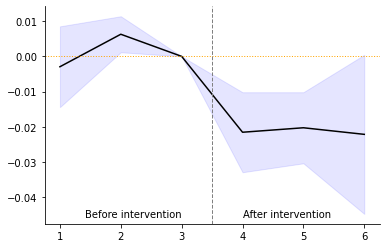

In [143]:
# 利用する情報のセットアップ
mapping_col_to_time = {
    'QuarterNum_1:IsTreatmentGroup': 1, 
    'QuarterNum_2:IsTreatmentGroup': 2,
    'QuarterNum_4:IsTreatmentGroup': 4,
    'QuarterNum_5:IsTreatmentGroup': 5,
    'QuarterNum_6:IsTreatmentGroup': 6,    
}
colname_time, colname_coef, colname_lower, colname_upper = 'time', 'Coef.', '[0.025', '0.975]'
# プロットする元データを作成する
df_plot = (
    result_correted.summary2().tables[1]
    .loc[mapping_col_to_time.keys()]
    .reset_index()
    .assign(**{colname_time: lambda dfx: dfx['index'].replace(mapping_col_to_time)})
    .append(pd.Series({colname_time: 3, colname_coef: 0, colname_lower: 0, colname_upper: 0}), True)
    .sort_values(colname_time)
)
# プロットをする
fig, ax = plt.subplots()
ax.plot(df_plot[colname_time], df_plot[colname_coef], color='black')
ax.fill_between(df_plot[colname_time], df_plot[colname_lower], df_plot[colname_upper], color='blue', alpha=.1)
ax.axhline(0, color='orange', linewidth = 1, linestyle='dotted')
ax.axvline(3.5, color='grey', linewidth = 1, linestyle='dashed')
ax.text(3.5 - 0.5, df_plot[colname_lower].min(), 'Before intervention', horizontalalignment='right', verticalalignment='center')
ax.text(3.5 + 0.5, df_plot[colname_lower].min(), 'After intervention', horizontalalignment='left', verticalalignment='center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

# DiDの仮定チェック

## プレトレンドチェック

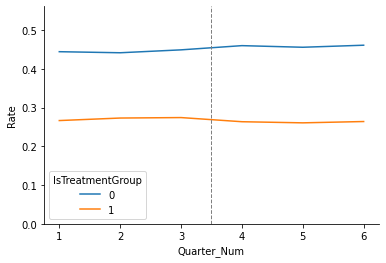

In [158]:
# データの読み込み
df_organ_donations_full= pd.read_csv('../data/ch4_organ_donations_full.csv')
# 集計
df_plot = df_organ_donations_full.groupby(['IsTreatmentGroup', 'Quarter_Num'])['Rate'].mean().reset_index()
# プロット
fig, ax = plt.subplots()
sns.lineplot(data=df_plot, x="Quarter_Num", y="Rate", hue='IsTreatmentGroup', ax=ax)
plt.axvline(3.5, color='grey', linewidth = 1, linestyle='dashed')
plt.ylim(0, df_plot['Rate'].max() + 0.1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

# 以降はやり直し

In [1]:
import hashlib

import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
from linearmodels.iv import IV2SLS
import matplotlib.pyplot as plt


from tqdm import tqdm
from scipy import stats

In [14]:
df_organ_donations_short= pd.read_csv('../data/ch4_organ_donations_short.csv')
df_organ_donations_short.head()

,State,Quarter,Rate,Quarter_Num,IsTreatmentGroup,AfterTreatment,IsTreatment
0,Alaska,Q22011,0.7700,3,0,0,0
1,Alaska,Q32011,0.7800,4,0,1,0
2,Arizona,Q22011,0.2261,3,0,0,0
3,Arizona,Q32011,0.2503,4,0,1,0
4,California,Q22011,0.2743,3,1,0,0


In [37]:
df_organ_donations_short['group_id'] = df_organ_donations_short['Quarter_Num'].astype(str) + '_' + df_organ_donations_short['State']
result = smf.ols("Rate ~ IsTreatment + C(State) + C(Quarter_Num)", data=df_organ_donations_short).fit()
result_correted = result.get_robustcov_results('cluster', groups=df_organ_donations_short['group_id'], df_correction=True, use_correction=True)
result_correted.summary()

/Users/s13592/Documents/project/python-treatment-evaluation/.venv/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 28, but rank is 27
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rate   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 2.056e+05
Date:                Sat, 10 Jun 2023   Prob (F-statistic):          5.30e-124
Time:                        11:22:00   Log-Likelihood:                 162.35
No. Observations:                  54   AIC:                            -266.7
Df Residuals:                      25   BIC:                            -209.0
Df Model:                          28                                         
Covariance Type:              cluster                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            0.7696      0.003    304.651      0.000       0.765       0.775
C(State)[T.Arizona]                 -0.5368      0.007    -77.310      0.000      -0.551      -0.523
C(State)[T.California]              -0.4953      0.003   -196.063      0.000      -0.500      -0.490
C(State)[T.Colorado]                -0.1024      0.007    -15.173      0.000      -0.116      -0.089
C(State)[T.Connecticut]             -0.3758      0.002   -234.155      0.000      -0.379      -0.373
C(State)[T.District of Columbia]    -0.4262      0.050     -8.506      0.000      -0.527      -0.326
C(State)[T.Florida]                 -0.3686      0.007    -56.459      0.000      -0.382      -0.356
C(State)[T.Hawaii]                  -0.3467      0.004    -77.514      0.000      -0.356      -0.338
C(State)[T.Louisiana]               -0.1966      0.012    -17.080      0.000      -0.220      -0.174
C(State)[T.Maryland]                -0.3115      0.010    -30.306      0.000      -0.332      -0.291
C(State)[T.Michigan]                -0.5558      0.022    -24.908      0.000      -0.601      -0.511
C(State)[T.Minnesota]               -0.2526      0.003    -74.525      0.000      -0.259      -0.246
C(State)[T.Missouri]                -0.3674      0.004    -85.080      0.000      -0.376      -0.359
C(State)[T.Montana]                 -0.1119      0.000   -229.356      0.000      -0.113      -0.111
C(State)[T.Nebraska]                -0.3367      0.003   -100.884      0.000      -0.343      -0.330
C(State)[T.New Hampshire]           -0.2261      0.022    -10.418      0.000      -0.270      -0.183
C(State)[T.New Jersey]              -0.4676      0.002   -227.185      0.000      -0.472      -0.463
C(State)[T.New York]                -0.6368      0.002   -413.469      0.000      -0.640      -0.634
C(State)[T.North Carolina]          -0.2420      0.005    -52.285      0.000      -0.251      -0.233
C(State)[T.Ohio]                    -0.2049      0.006    -36.178      0.000      -0.216      -0.194
C(State)[T.Pennsylvania]            -0.3194      0.005    -59.668      0.000      -0.330      -0.309
C(State)[T.South Carolina]          -0.5151      0.001   -393.616      0.000      -0.518      -0.513
C(State)[T.Tennessee]               -0.4345      0.003   -132.208      0.000      -0.441      -0.428
C(State)[T.Virginia]                -0.4227      0.001   -293.384      0.000      -0.426      -0.420
C(State)[T.Washington]              -0.1886      0.008    -25.047      0.000      -0.204      -0.173
C(State)[T.Wisconsin]               -0.2046      0.007    -27.942      0.000      -0.219      -0.190
C(State)[T.Wyoming]                 -0.1826      0.007    -26.044      0.000      -0.197      -0.169
C(Quarter_Num)[T.4]                  0.0109      0.00

In [40]:
mod = PanelOLS.from_formula("Rate ~ AfterTreatment:IsTreatmentGroup + EntityEffects + TimeEffects", data=df_organ_donations_short.set_index(["State", "Quarter_Num"]))
result = mod.fit(cov_type='clustered', cluster_entity=True, cluster_time=True)
result.summary

Dep. Variable:,Rate,R-squared:,0.0281
Estimator:,PanelOLS,R-squared (Between):,-0.0010
No. Observations:,54,R-squared (Within):,-0.0002
Date:,"Sat, Jun 10 2023",R-squared (Overall):,-0.0010
Time:,11:40:11,Log-likelihood,162.35
Cov. Estimator:,Clustered,,
,,F-statistic:,0.7237
Entities:,27,P-value,0.4030
Avg Obs:,2.0000,Distribution:,"F(1,25)"
Min Obs:,2.0000,,
Max Obs:,2.0000,F-statistic (robust):,18.817


In [43]:
result.std_errors

AfterTreatment:IsTreatmentGroup    0.004971
Name: std_error, dtype: float64

In [11]:
import causaldata
import pandas as pd
import numpy as np
import patsy
from linearmodels.panel import PanelOLS

In [15]:
print(causaldata.organ_donations.data.DESCRLONG)
print(causaldata.organ_donations.data.NOTE)
df = (
    causaldata.organ_donations.data.load_pandas().data
    .pipe(lambda dfx: dfx[dfx['Quarter_Num'].isin([3, 4])])
    
)
df.head(10)
# pd.read_csv('https://github.com/NickCH-K/causaldata/blob/main/Python/causaldata/organ_donations/organ_donation.csv')

The organ_donation data contains data from Kessler and Roth (2014) on organ donation rates by state and quarter. The state of California enacted an active-choice phrasing for their organ donation sign-up questoin in Q32011. The only states included in the data are California and those that can serve as valid controls; see Kessler and Roth (2014). This data set is used in the Difference-in-Differences chapter of The Effect.
::
    Number of observations - 162
    Number of variables - 3
    Variables name definitions::
            bpl - Birth State
            State - The state, where California is the Treated group
            Quarter - Quarter of observation, in "Q"QYYYY format
            Rate - Organ donation rate
            Quarter_Num - Quarter of observation in numerical format. 1 = Quarter 4, 2010



,State,Quarter,Rate,Quarter_Num
2,Alaska,Q22011,0.7700,3
3,Alaska,Q32011,0.7800,4
8,Arizona,Q22011,0.2261,3
9,Arizona,Q32011,0.2503,4
14,California,Q22011,0.2743,3
15,California,Q32011,0.2636,4
20,Colorado,Q22011,0.6736,3
21,Colorado,Q32011,0.6715,4
26,Connecticut,Q22011,0.3952,3
27,Connecticut,Q32011,0.4031,4


In [16]:
# df_did = df.assign(
#     IsTreatmentGroup = lambda dfx: np.where(dfx['State'] == 'California', 1, 0),
#     AfterTreatment = lambda dfx: np.where(dfx['Quarter_Num'] > 3, 1, 0)
# )
df['IsTreatmentGroup'] = np.where(df['State'] == 'California', 1, 0)
df['AfterTreatment'] = np.where(df['Quarter_Num'] > 3, 1, 0)
df.head(10)

/var/folders/6s/tb_rn7ds7435kf9r5l7mgxs8v79db2/T/ipykernel_8926/1870479913.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IsTreatmentGroup'] = np.where(df['State'] == 'California', 1, 0)
/var/folders/6s/tb_rn7ds7435kf9r5l7mgxs8v79db2/T/ipykernel_8926/1870479913.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AfterTreatment'] = np.where(df['Quarter_Num'] > 3, 1, 0)


,State,Quarter,Rate,Quarter_Num,IsTreatmentGroup,AfterTreatment
2,Alaska,Q22011,0.7700,3,0,0
3,Alaska,Q32011,0.7800,4,0,1
8,Arizona,Q22011,0.2261,3,0,0
9,Arizona,Q32011,0.2503,4,0,1
14,California,Q22011,0.2743,3,1,0
15,California,Q32011,0.2636,4,1,1
20,Colorado,Q22011,0.6736,3,0,0
21,Colorado,Q32011,0.6715,4,0,1
26,Connecticut,Q22011,0.3952,3,0,0
27,Connecticut,Q32011,0.4031,4,0,1


In [17]:
df.groupby(['IsTreatmentGroup', 'AfterTreatment'])['Rate'].mean().to_frame()

Rate
IsTreatmentGroup AfterTreatment          
0                0               0.449015
                 1               0.459881
1                0               0.274300
                 1               0.263600

In [18]:

mod = PanelOLS.from_formula("Rate ~ AfterTreatment:IsTreatmentGroup + EntityEffects + TimeEffects", data=df.set_index(["State", "Quarter_Num"]))
result = mod.fit(cov_type='clustered', cluster_entity=True)
result.summary

Dep. Variable:,Rate,R-squared:,0.0281
Estimator:,PanelOLS,R-squared (Between):,-0.0010
No. Observations:,54,R-squared (Within):,-0.0002
Date:,"Wed, May 03 2023",R-squared (Overall):,-0.0010
Time:,17:31:42,Log-likelihood,162.35
Cov. Estimator:,Clustered,,
,,F-statistic:,0.7237
Entities:,27,P-value,0.4030
Avg Obs:,2.0000,Distribution:,"F(1,25)"
Min Obs:,2.0000,,
Max Obs:,2.0000,F-statistic (robust):,9.4085


In [19]:
df = (
    causaldata.organ_donations.data.load_pandas().data

)
df.head(10)
# pd.read_csv('https://github.com/NickCH-K/causaldata/blob/main/Python/causaldata/organ_donations/organ_donation.csv')

,State,Quarter,Rate,Quarter_Num
0,Alaska,Q42010,0.7500,1
1,Alaska,Q12011,0.7700,2
2,Alaska,Q22011,0.7700,3
3,Alaska,Q32011,0.7800,4
4,Alaska,Q42011,0.7800,5
5,Alaska,Q12012,0.7900,6
6,Arizona,Q42010,0.2634,1
7,Arizona,Q12011,0.2092,2
8,Arizona,Q22011,0.2261,3
9,Arizona,Q32011,0.2503,4


In [20]:
df['IsTreatmentGroup'] = np.where(df['State'] == 'California', 1, 0)
df['AfterTreatment'] = np.where(df['Quarter_Num'] > 3, 1, 0)
mod = PanelOLS.from_formula("Rate ~ AfterTreatment:IsTreatmentGroup + EntityEffects + TimeEffects", data=df.set_index(["State", "Quarter_Num"]))
result = mod.fit(cov_type='clustered', cluster_entity=True)
result.summary

Dep. Variable:,Rate,R-squared:,0.0092
Estimator:,PanelOLS,R-squared (Between):,-0.0010
No. Observations:,162,R-squared (Within):,-0.0021
Date:,"Wed, May 03 2023",R-squared (Overall):,-0.0010
Time:,17:31:42,Log-likelihood,388.57
Cov. Estimator:,Clustered,,
,,F-statistic:,1.2006
Entities:,27,P-value,0.2752
Avg Obs:,6.0000,Distribution:,"F(1,129)"
Min Obs:,6.0000,,
Max Obs:,6.0000,F-statistic (robust):,11.525


In [58]:
df['Quarter'] = np.where(df['State'] == 'California', df['Quarter_Num'], 0)
quarter_dummies = pd.get_dummies(df['Quarter'], prefix='Quarter', drop_first=False)
df_regression = pd.concat([df, quarter_dummies], axis=1)
mod = PanelOLS.from_formula(
    "Rate ~ Quarter_1 + Quarter_2 + Quarter_4 + Quarter_5 + Quarter_6 + EntityEffects + TimeEffects", 
    data=df_regression.set_index(["State", "Quarter_Num"]), 
    drop_absorbed=True
)
result = mod.fit(cov_type='clustered', cluster_entity=True)
result.summary

Dep. Variable:,Rate,R-squared:,0.0098
Estimator:,PanelOLS,R-squared (Between):,-0.0009
No. Observations:,162,R-squared (Within):,-0.0021
Date:,"Thu, May 04 2023",R-squared (Overall):,-0.0009
Time:,22:22:07,Log-likelihood,388.62
Cov. Estimator:,Clustered,,
,,F-statistic:,0.2471
Entities:,27,P-value,0.9406
Avg Obs:,6.0000,Distribution:,"F(5,125)"
Min Obs:,6.0000,,
Max Obs:,6.0000,F-statistic (robust):,4.9490


In [56]:
df['Quarter'] = np.where(df['State'] == 'California', df['Quarter_Num'], 0)
quarter_dummies = pd.get_dummies(df['Quarter'], prefix='Quarter', drop_first=False)
df_regression = pd.concat([df, quarter_dummies], axis=1)
mod = PanelOLS.from_formula("Rate ~ Quarter_1 + Quarter_2 + Quarter_4 + Quarter_5 + Quarter_6 + EntityEffects + TimeEffects", data=df_regression.set_index(["State", "Quarter_Num"]), drop_absorbed=True)
result = mod.fit(cov_type='clustered', cluster_entity=True)
result.summary

Dep. Variable:,Rate,R-squared:,0.0098
Estimator:,PanelOLS,R-squared (Between):,-0.0009
No. Observations:,162,R-squared (Within):,-0.0021
Date:,"Thu, May 04 2023",R-squared (Overall):,-0.0009
Time:,22:21:13,Log-likelihood,388.62
Cov. Estimator:,Clustered,,
,,F-statistic:,0.2471
Entities:,27,P-value,0.9406
Avg Obs:,6.0000,Distribution:,"F(5,125)"
Min Obs:,6.0000,,
Max Obs:,6.0000,F-statistic (robust):,4.9490


In [61]:
quarter_dummies = pd.get_dummies(df['Quarter_Num'], prefix='QuarterNum', drop_first=False)
df_regression = pd.concat([df, quarter_dummies], axis=1)
df_regression['IsTreatmentGroup'] = np.where(df_regression['State'] == 'California', 1, 0)
mod = PanelOLS.from_formula("Rate ~ QuarterNum_1:IsTreatmentGroup + QuarterNum_2:IsTreatmentGroup + QuarterNum_4:IsTreatmentGroup + QuarterNum_5:IsTreatmentGroup + QuarterNum_6:IsTreatmentGroup + EntityEffects + TimeEffects", data=df_regression.set_index(["State", "Quarter_Num"]), drop_absorbed=True)
result = mod.fit(cov_type='clustered', cluster_entity=True)
result.summary

Dep. Variable:,Rate,R-squared:,0.0098
Estimator:,PanelOLS,R-squared (Between):,-0.0009
No. Observations:,162,R-squared (Within):,-0.0021
Date:,"Thu, May 04 2023",R-squared (Overall):,-0.0009
Time:,22:24:40,Log-likelihood,388.62
Cov. Estimator:,Clustered,,
,,F-statistic:,0.2471
Entities:,27,P-value,0.9406
Avg Obs:,6.0000,Distribution:,"F(5,125)"
Min Obs:,6.0000,,
Max Obs:,6.0000,F-statistic (robust):,4.9490


/var/folders/6s/tb_rn7ds7435kf9r5l7mgxs8v79db2/T/ipykernel_8926/3381626565.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pd.DataFrame(np.c_[xs, params, conf_lower, conf_upper], columns=['time', 'estimates', 'lower', 'upper'])


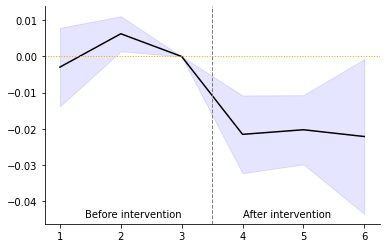

In [149]:

xs = [1, 2, 4, 5, 6]
params = result.params.values
conf_lower = result.conf_int()['lower'].values
conf_upper = result.conf_int()['upper'].values
df_plot = (
    pd.DataFrame(np.c_[xs, params, conf_lower, conf_upper], columns=['time', 'estimates', 'lower', 'upper'])
    .append(pd.Series({'time': 3, 'estimates': 0, 'lower': 0, 'upper': 0}), True)
    .sort_values('time')
)
fig, ax = plt.subplots()
ax.plot(df_plot['time'], df_plot['estimates'], color='black')
ax.fill_between(df_plot['time'], df_plot['lower'], df_plot['upper'], color='blue', alpha=.1)
ax.axhline(0, color='orange', linewidth = 1, linestyle='dotted')
ax.axvline(3.5, color='grey', linewidth = 1, linestyle='dashed')
ax.text(3.5 - 0.5, df_plot['lower'].min(), 'Before intervention', horizontalalignment='right', verticalalignment='center')
ax.text(3.5 + 0.5, df_plot['lower'].min(), 'After intervention', horizontalalignment='left', verticalalignment='center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [110]:
df_plot

,time,estimates,lower,upper
0,1.0,-0.002942,-0.013829,0.007944
1,2.0,0.006296,0.001445,0.011148
5,3.0,0.000000,0.000000,0.000000
2,4.0,-0.021565,-0.032344,-0.010787
3,5.0,-0.020292,-0.029871,-0.010714
4,6.0,-0.022165,-0.043606,-0.000725


In [72]:
type(result)

linearmodels.panel.results.PanelEffectsResults

In [9]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import linearmodels


def is_treatment(first_treat, year):
    if first_treat == 0:
        return 0
    if year >= first_treat:
        return 1
    return 0


def is_treatment_group(first_treat):
    if first_treat == 0:
        return 0
    return 1
    
    
mpdta = (
    pd.read_csv('../data/mpdta.csv')
    .assign(
        is_treatment = lambda dfx: dfx.apply(lambda record: is_treatment(record['first.treat'], record['year']), axis=1),
        is_treatment_group = lambda dfx: dfx.apply(lambda record: is_treatment_group(record['first.treat']), axis=1),
    )
)
df_no_staggerd = (
    mpdta
    .pipe(lambda dfx: dfx[dfx['first.treat'].isin([0, 2007])])
)
df = (
    mpdta
    .pipe(lambda dfx: dfx[dfx['year'].isin([2006, 2007]) & dfx['first.treat'].isin([0, 2007])])
)

In [10]:
mpdta['first.treat'].unique()

array([2007, 2006,    0, 2004])

In [11]:
df

,year,countyreal,lpop,lemp,first.treat,treat,is_treatment,is_treatment_group
3,2006,8001,5.896761,8.378161,2007,1,0,1
4,2007,8001,5.896761,8.487352,2007,1,1,1
8,2006,8019,2.232377,4.990433,2007,1,0,1
9,2007,8019,2.232377,5.036953,2007,1,1,1
13,2006,8023,1.298282,1.945910,2007,1,0,1
...,...,...,...,...,...,...,...,...
2434,2007,54085,2.336310,4.262680,2007,1,1,1
2438,2006,54087,2.737350,4.143135,2007,1,0,1
2439,2007,54087,2.737350,4.382027,2007,1,1,1
2443,2006,54099,3.758942,5.056246,2007,1,0,1


In [12]:
mpdta['first.treat'].value_counts()

0       1545
2007     655
2006     200
2004     100
Name: first.treat, dtype: int64

# Difference in Differenceを用いた分析をする
## Prelude

- DID的な状況での分析ストーリー
    - 企業向けに研修サービスを提供しているX社でのお話
    - Y社ではIT企業C社と協賛でより高い効果があるであろう新しい研修パッケージを作成し、またその研修を実施した
    - Y社に所属するBさんはその研修による成果についての分析を任された。
    - 「A/Bテストは実施できない、、、」
    - そこで、Bさんは２つの分析を行った
        - 研修前後のC社社員のパフォーマンスの違いを分析
        - 研修後のC社社員のパフォーマンスと当該研修を実施しなかったD社社員のパフォーマンスの比較
    - しかしD社で同様の研修を行ったところ、思ったようなポフォーマンスは出なかった
- **この分析の何が悪かったのだろうか？**

In [13]:
print('研修後のC社社員のパフォーマンスと当該研修を実施しなかったD社社員のパフォーマンスの比較')
df[df['year'] == 2007].groupby(['is_treatment', 'year'])['lemp'].mean()

研修後のC社社員のパフォーマンスと当該研修を実施しなかったD社社員のパフォーマンスの比較


is_treatment  year
0             2007    5.661133
1             2007    5.820048
Name: lemp, dtype: float64

In [14]:
print('研修前後のC社社員のパフォーマンスの違いを分析')
df[df['first.treat'] == 2007].groupby(['is_treatment', 'year'])['lemp'].mean()

研修前後のC社社員のパフォーマンスの違いを分析


is_treatment  year
0             2006    5.823866
1             2007    5.820048
Name: lemp, dtype: float64

実はこれ， 最低賃金と雇用量のデータなのでもうちょっと穏当なデータにしたい．．．

## 施策の実施有無と実施前後：なぜBさんの分析は失敗したのか？

## Difference in Difference(DIDが使える状況)
### Example: DIDを用いた分析の実装

In [97]:
result = smf.ols("lemp ~ C(is_treatment, Treatment(reference=0)) + C(year) + C(countyreal)", data=df).fit()
result_correted = result.get_robustcov_results('cluster', groups=df[['countyreal', 'year']], use_correction=True, df_correction=True)
summary = result_correted.summary2()
summary.tables[1] = summary.tables[1].filter(regex='^(?!.*countyreal).*$', axis=0)
summary

/Users/s13592/Documents/project/other/adhoc_research/.venv/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1817: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Ordinary least squares
============================================================================================
Model:                       OLS                      Adj. R-squared:             0.994     
Dependent Variable:          lemp                     AIC:                        -1046.9267
Date:                        2022-02-21 00:55         BIC:                        1065.7988 
No. Observations:            880                      Log-Likelihood:             965.46    
Df Model:                    441                      F-statistic:                -5.149e+04
Df Residuals:                438                      Prob (F-statistic):         1.00      
R-squared:                   0.997                    Scale:                      0.013110  
--------------------------------------------------------------------------------------------
                                              Coef.  Std.Err.    t     P>|t|   [0.025 0.975]
--------------------------------------------------------------------------------------------
Intercept                                     8.4347   0.0570 147.9927 0.0043  7.7105 9.1588
C(is_treatment, Treatment(reference=0))[T.1] -0.0261   0.0167  -1.5590 0.3631 -0.2384 0.1863
C(year)[T.2007]                               0.0222   0.0093   2.3918 0.2521 -0.0959 0.1404
--------------------------------------------------------------------------------------------
Omnibus:                      188.163               Durbin-Watson:                  3.036   
Prob(Omnibus):                0.000                 Jarque-Bera (JB):               5918.964
Skew:                         -0.000                Prob(JB):                       0.000   
Kurtosis:                     15.705                Condition No.:                  512     
============================================================================================

"""

## 並行トレンド仮定のチェック
### Example: 並行トレンド仮定のチェックの実装

In [92]:
df_no_staggerd.groupby(['is_treatment_group', 'year'])['lemp'].mean()

is_treatment_group  year
0                   2003    5.654630
                    2004    5.592000
                    2005    5.604808
                    2006    5.638896
                    2007    5.661133
1                   2003    5.842906
                    2004    5.810783
                    2005    5.820866
                    2006    5.823866
                    2007    5.820048
Name: lemp, dtype: float64

k

<AxesSubplot:xlabel='year', ylabel='lemp'>

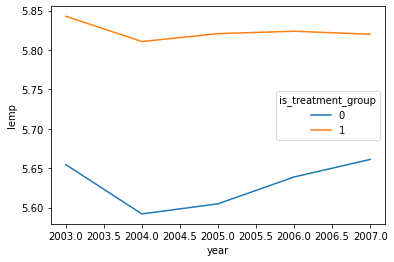

In [94]:
import seaborn as sns

sns.lineplot(data=df_no_staggerd, x="year", y="lemp", hue='is_treatment_group', ci=None)

## DID的なデザイン：Event Study

In [102]:
result = smf.ols("lemp ~ C(is_treatment, Treatment(reference=0)) * C(year, Treatment(reference=2003)) + C(countyreal, Treatment(reference=8001))", data=mpdta).fit()
result_correted = result.get_robustcov_results('cluster', groups=mpdta[['countyreal', 'year']], use_correction=True, df_correction=True)
# result_correted = result.get_robustcov_results('hac-panel', groups=mpdta['countyreal'], time=mpdta['year'], maxlags=4)
summary = result_correted.summary2()
summary.tables[1] = summary.tables[1].filter(regex='^(?!.*countyreal).*$', axis=0)
summary

/Users/s13592/Documents/project/other/adhoc_research/.venv/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1817: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))
/Users/s13592/Documents/project/other/adhoc_research/.venv/lib/python3.8/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 508, but rank is 507
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                                    Results: Ordinary least squares
========================================================================================================================================
Model:                                     OLS                                     Adj. R-squared:                            0.992     
Dependent Variable:                        lemp                                    AIC:                                       -2323.3177
Date:                                      2022-02-21 11:28                        BIC:                                       635.2977  
No. Observations:                          2500                                    Log-Likelihood:                            1669.7    
Df Model:                                  507                                     F-statistic:                               -3297.    
Df Residuals:                              1992                                    Prob (F-statistic):                        1.00      
R-squared:                                 0.993                                   Scale:                                     0.019323  
----------------------------------------------------------------------------------------------------------------------------------------
                                                                                         Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
----------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                8.4317   0.0132 636.9905 0.0000  8.3950  8.4685
C(is_treatment, Treatment(reference=0))[T.1]                                            -0.0119   0.0178  -0.6653 0.5423 -0.0614  0.0377
C(year, Treatment(reference=2003))[T.2004]                                              -0.0560      nan      nan    nan     nan     nan
C(year, Treatment(reference=2003))[T.2005]                                              -0.0442   0.0033 -13.5168 0.0002 -0.0533 -0.0351
C(year, Treatment(reference=2003))[T.2006]                                              -0.0185   0.0078  -2.3652 0.0772 -0.0403  0.0032
C(year, Treatment(reference=2003))[T.2007]                                               0.0089   0.0092   0.9646 0.3894 -0.0166  0.0344
C(is_treatment, Treatment(reference=0))[T.1]:C(year, Treatment(reference=2003))[T.2004]  0.0490   0.0209   2.3506 0.0785 -0.0089  0.1070
C(is_treatment, Treatment(reference=0))[T.1]:C(year, Treatment(reference=2003))[T.2005] -0.0099   0.0187  -0.5282 0.6253 -0.0619  0.0421
C(is_treatment, Treatment(reference=0))[T.1]:C(year, Treatment(reference=2003))[T.2006] -0.0182   0.0081  -2.2358 0.0890 -0.0408  0.0044
C(is_treatment, Treatment(reference=0))[T.1]:C(year, Treatment(reference=2003))[T.2007] -0.0328   0.0152  -2.1557 0.0974 -0.0751  0.0095
----------------------------------------------------------------------------------------------------------------------------------------
Omnibus:                                  704.530                           Durbin-Watson:                              1.925           
Prob(Omnibus):                            0.000                             Jarque-Bera (JB):                           19833.796       
Skew:                                     -0.720                            Prob(JB):                                   0.000           
Kurtosis:                                 16.723                            Condition No.:                              3065515849998840
========================================================================================================================================
* The condition number is large (3e+15). This might indicate             strong multicollinearity or other numerical problems.
"""

## DID的なデザイン：Staggered DID

[https://gyazo.com/6696e70c4009eacd9511bebfaebbff68]

In [106]:
result = smf.ols("lemp ~ C(is_treatment, Treatment(reference=0)) + C(year) + C(countyreal)", data=mpdta).fit()
result_correted = result.get_robustcov_results('cluster', groups=mpdta[['countyreal', 'year']], use_correction=True, df_correction=True)
# result_correted = result.get_robustcov_results('hac-panel', groups=mpdta['countyreal'], time=mpdta['year'], maxlags=4)
summary = result_correted.summary2()
summary.tables[1] = summary.tables[1].filter(regex='^(?!.*countyreal).*$', axis=0)
summary

/Users/s13592/Documents/project/other/adhoc_research/.venv/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1817: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))


<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Ordinary least squares
=============================================================================================
Model:                        OLS                      Adj. R-squared:             0.992     
Dependent Variable:           lemp                     AIC:                        -2323.6840
Date:                         2022-02-21 11:33         BIC:                        617.4593  
No. Observations:             2500                     Log-Likelihood:             1666.8    
Df Model:                     504                      F-statistic:                -3409.    
Df Residuals:                 1995                     Prob (F-statistic):         1.00      
R-squared:                    0.993                    Scale:                      0.019338  
---------------------------------------------------------------------------------------------
                                              Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
---------------------------------------------------------------------------------------------
Intercept                                     8.4299   0.0147 571.9112 0.0000  8.3889  8.4708
C(is_treatment, Treatment(reference=0))[T.1] -0.0365   0.0130  -2.8214 0.0478 -0.0725 -0.0006
C(year)[T.2004]                              -0.0531      nan      nan    nan     nan     nan
C(year)[T.2005]                              -0.0436   0.0030 -14.3961 0.0001 -0.0520 -0.0352
C(year)[T.2006]                              -0.0178   0.0078  -2.2820 0.0846 -0.0394  0.0039
C(year)[T.2007]                               0.0057   0.0096   0.5987 0.5816 -0.0209  0.0324
---------------------------------------------------------------------------------------------
Omnibus:                      701.076               Durbin-Watson:                  1.921    
Prob(Omnibus):                0.000                 Jarque-Bera (JB):               19602.299
Skew:                         -0.716                Prob(JB):                       0.000    
Kurtosis:                     16.643                Condition No.:                  545      
=============================================================================================

"""

### Staggeredな状況ではtwo-way fixed effectはバイアスを生む

[https://gyazo.com/e0b5047dd8f5fea10142a76840218530]